In [1]:
import numpy as np
import pandas as pd

### Khai triển SVD

In [2]:
A=np.array([[4,11,14],[8,7,-2]])
print(A)

[[ 4 11 14]
 [ 8  7 -2]]


In [3]:
AtA=A.T@A
print(AtA)

[[ 80 100  40]
 [100 170 140]
 [ 40 140 200]]


In [4]:
lam,V=np.linalg.eigh(AtA)
print(lam.round(3))
print(V)

[ -0.  90. 360.]
[[-0.66666667 -0.66666667  0.33333333]
 [ 0.66666667 -0.33333333  0.66666667]
 [-0.33333333  0.66666667  0.66666667]]


In [5]:
s1=np.sqrt(lam[2])
s2=np.sqrt(lam[1])
#s1>s2

In [6]:
v1=V[:,2]
v2=V[:,1]
v3=V[:,0]

In [7]:
u1=np.dot(A,v1)/s1
u2=np.dot(A,v2)/s2

In [8]:
D=np.zeros(A.shape)
D[0,0]=s1
D[1,1]=s2
print(D)

[[18.97366596  0.          0.        ]
 [ 0.          9.48683298  0.        ]]


In [9]:
U=np.array([u1,u2])
V=np.array([v1,v2,v3])
print(U)
print(V)

[[ 0.9486833   0.31622777]
 [ 0.31622777 -0.9486833 ]]
[[ 0.33333333  0.66666667  0.66666667]
 [-0.66666667 -0.33333333  0.66666667]
 [-0.66666667  0.66666667 -0.33333333]]


In [10]:
U@D@V,A

(array([[ 4., 11., 14.],
        [ 8.,  7., -2.]]),
 array([[ 4, 11, 14],
        [ 8,  7, -2]]))

In [11]:
Dr=np.diag([s1,s2])
print(Dr)

[[18.97366596  0.        ]
 [ 0.          9.48683298]]


In [12]:
Ur=np.array([u1,u2])
Vr=np.array([v1,v2])
print(Ur)
print(Vr)

[[ 0.9486833   0.31622777]
 [ 0.31622777 -0.9486833 ]]
[[ 0.33333333  0.66666667  0.66666667]
 [-0.66666667 -0.33333333  0.66666667]]


In [13]:
Ur@Dr@Vr, A

(array([[ 4., 11., 14.],
        [ 8.,  7., -2.]]),
 array([[ 4, 11, 14],
        [ 8,  7, -2]]))

In [14]:
from numpy.linalg import svd as svd

In [15]:
u,s,vt=svd(A)
print(u)
print(s)
print(vt)

[[ 0.9486833  -0.31622777]
 [ 0.31622777  0.9486833 ]]
[18.97366596  9.48683298]
[[ 0.33333333  0.66666667  0.66666667]
 [ 0.66666667  0.33333333 -0.66666667]
 [-0.66666667  0.66666667 -0.33333333]]


In [16]:
D=np.zeros(A.shape)
D[0,0]=s[0]
D[1,1]=s[1]
print(D)

[[18.97366596  0.          0.        ]
 [ 0.          9.48683298  0.        ]]


In [17]:
u@D@vt,A

(array([[ 4., 11., 14.],
        [ 8.,  7., -2.]]),
 array([[ 4, 11, 14],
        [ 8,  7, -2]]))

In [18]:
A_pinv=Vr.T@np.diag([1/s1,1/s2])@Ur.T
print(A_pinv)

[[-0.00555556  0.07222222]
 [ 0.02222222  0.04444444]
 [ 0.05555556 -0.05555556]]


In [19]:
np.linalg.pinv(A)

array([[-0.00555556,  0.07222222],
       [ 0.02222222,  0.04444444],
       [ 0.05555556, -0.05555556]])

In [20]:
C=A@A.T
print(C)

[[333  81]
 [ 81 117]]


In [21]:
lam,u=np.linalg.eigh(A@A.T)
print(lam)
print(u)

[ 90. 360.]
[[ 0.31622777 -0.9486833 ]
 [-0.9486833  -0.31622777]]


In [22]:
s1=np.sqrt(lam[1])
s2=np.sqrt(lam[0])

In [23]:
u1=u[:,1]
u2=u[:,0]

In [24]:
v1=A.T@u1/s1
v2=A.T@u2/s2

In [25]:
v1.reshape(-1,1).T.shape

(1, 3)

In [26]:
s1*u1.reshape(-1,1)@v1.reshape(-1,1).T+s2*u2.reshape(-1,1)@v2.reshape(-1,1).T

array([[ 4., 11., 14.],
       [ 8.,  7., -2.]])

In [27]:

Ap=1/s1*v1.reshape(-1,1)@u1.reshape(-1,1).T+1/s2*v2.reshape(-1,1)@u2.reshape(-1,1).T


In [28]:
print(np.round(Ap,4))

[[-0.0056  0.0722]
 [ 0.0222  0.0444]
 [ 0.0556 -0.0556]]


In [29]:
print(np.round(np.linalg.pinv(A),4))

[[-0.0056  0.0722]
 [ 0.0222  0.0444]
 [ 0.0556 -0.0556]]


In [30]:
A1=s1*u1.reshape(-1,1)@v1.reshape(-1,1).T
print(A1)

[[ 6. 12. 12.]
 [ 2.  4.  4.]]


In [31]:
np.linalg.norm(A-A1)

9.486832980505138

In [32]:
s2

9.486832980505138

In [33]:
u,s,vT=np.linalg.svd(A)
print(u)
print(s)
print(vT)

[[ 0.9486833  -0.31622777]
 [ 0.31622777  0.9486833 ]]
[18.97366596  9.48683298]
[[ 0.33333333  0.66666667  0.66666667]
 [ 0.66666667  0.33333333 -0.66666667]
 [-0.66666667  0.66666667 -0.33333333]]


In [34]:
D=np.zeros(A.shape)
D[0,0]=s[0]
D[1,1]=s[1]
print(D)


[[18.97366596  0.          0.        ]
 [ 0.          9.48683298  0.        ]]


In [35]:
u@D@vT

array([[ 4., 11., 14.],
       [ 8.,  7., -2.]])

In [38]:
v = vT.T

# $A=\sigma_1u_1v_1^T+\sigma_2u_2v_2^T$ 

In [39]:
s[0]*u[:,0].reshape(2,1).dot(v[0,:].reshape(3,1).T)+s[1]*u[:,1].reshape(2,1).dot(v[1,:].reshape(3,1).T)

array([[  4.,  11., -14.],
       [  8.,   7.,   2.]])

In [40]:
s1=s[0]
u1=u[:,0].reshape(2,1)
v1=v[0,:].reshape(3,1)
print(s1,u1,v1)

18.973665961010283 [[0.9486833 ]
 [0.31622777]] [[ 0.33333333]
 [ 0.66666667]
 [-0.66666667]]


In [41]:
s2=s[1]
u2=u[:,1].reshape(2,1)
v2=v[1,:].reshape(3,1)
print(s2,u2,v2)

9.486832980505136 [[-0.31622777]
 [ 0.9486833 ]] [[0.66666667]
 [0.33333333]
 [0.66666667]]


In [42]:
# Check
s1*u1.dot(v1.T)+s2*u2.dot(v2.T)

array([[  4.,  11., -14.],
       [  8.,   7.,   2.]])

In [43]:
C=A.T@A
print(C)

[[ 80 100  40]
 [100 170 140]
 [ 40 140 200]]


In [44]:
lam,v=np.linalg.eigh(C)
print(lam.round(3))
print(v.round(3))

[ -0.  90. 360.]
[[-0.667 -0.667  0.333]
 [ 0.667 -0.333  0.667]
 [-0.333  0.667  0.667]]


In [45]:
v[:,2]

array([0.33333333, 0.66666667, 0.66666667])

In [46]:
u1=A.dot(v[:,2])/np.sqrt(lam[2])
print(u1)

[0.9486833  0.31622777]


In [47]:
u2=A.dot(v[:,1])/np.sqrt(lam[1])
print(u2)

[ 0.31622777 -0.9486833 ]


In [48]:
U=np.array([u1,u2])
print(U[:,0])
print(U)

[0.9486833  0.31622777]
[[ 0.9486833   0.31622777]
 [ 0.31622777 -0.9486833 ]]


In [49]:
S=np.sqrt(lam.round(3))
print(S)

[-0.          9.48683298 18.97366596]


In [50]:
lam1=np.sqrt(lam)

C:\Users\baotg2\AppData\Local\Temp\ipykernel_21136\3770038234.py:1: RuntimeWarning: invalid value encountered in sqrt
  lam1=np.sqrt(lam)


In [51]:
U

array([[ 0.9486833 ,  0.31622777],
       [ 0.31622777, -0.9486833 ]])

In [52]:
v[:,2]

array([0.33333333, 0.66666667, 0.66666667])

In [53]:
V=np.array([v[:,2],v[:,1],v[:,0]]).T
print(V)
print(V[:,0])

[[ 0.33333333 -0.66666667 -0.66666667]
 [ 0.66666667 -0.33333333  0.66666667]
 [ 0.66666667  0.66666667 -0.33333333]]
[0.33333333 0.66666667 0.66666667]


In [54]:
D=np.zeros(A.shape)

In [55]:
D[1,1]=lam1[1]
D[0,0]=lam1[2]
print(D)

[[18.97366596  0.          0.        ]
 [ 0.          9.48683298  0.        ]]


In [56]:
#U@D@V.T
np.dot(U,np.dot(D,V.T))

array([[ 4., 11., 14.],
       [ 8.,  7., -2.]])

In [57]:
C=A.dot(A.T) #AA^T
print("AA^T=",C)

AA^T= [[333  81]
 [ 81 117]]


In [58]:
lam1,u=np.linalg.eigh(C)
print(lam1)
print(u.round(3))

[ 90. 360.]
[[ 0.316 -0.949]
 [-0.949 -0.316]]


In [59]:
v0=A.T.dot(u[:,0])/np.sqrt(lam1[0])
v1=A.T.dot(u[:,1])/np.sqrt(lam1[1])

In [60]:
V=np.array([v0,v1])
print(V)

[[-0.66666667 -0.33333333  0.66666667]
 [-0.33333333 -0.66666667 -0.66666667]]


In [61]:
S=np.diag(np.sqrt(lam1))
print(S)

[[ 9.48683298  0.        ]
 [ 0.         18.97366596]]


In [62]:
u.dot(S.dot(V))

array([[ 4., 11., 14.],
       [ 8.,  7., -2.]])

In [63]:
D=A.T.dot(A)
print(D)

[[ 80 100  40]
 [100 170 140]
 [ 40 140 200]]


In [64]:
lam2,v=np.linalg.eigh(D)
print(lam2.round(3))
print(v.round(3))

[ -0.  90. 360.]
[[-0.667 -0.667  0.333]
 [ 0.667 -0.333  0.667]
 [-0.333  0.667  0.667]]


In [65]:
s1=np.sqrt(lam1[1])
s2=np.sqrt(lam1[0])
Sr=np.diag([s1,s2])
print(Sr)

[[18.97366596  0.        ]
 [ 0.          9.48683298]]


In [66]:
r=np.linalg.matrix_rank(A)
print(r)

2


In [67]:
Ur=np.array([u[:,1],u[:,0]])
print(Ur)

[[-0.9486833  -0.31622777]
 [ 0.31622777 -0.9486833 ]]


In [68]:
Vr=np.array([v[:,2],v[:,1]])
print(Vr)

[[ 0.33333333  0.66666667  0.66666667]
 [-0.66666667 -0.33333333  0.66666667]]


In [69]:
#Ur*Sr*Vr^T
Ur.dot(Sr.dot(Vr))

array([[ -4., -11., -14.],
       [  8.,   7.,  -2.]])

In [70]:
# SVD
u,s,vt=np.linalg.svd(A)
print("u=",u.round(3))
print("s=",s.round(3))
print("vt=",v.round(3))

u= [[ 0.949 -0.316]
 [ 0.316  0.949]]
s= [18.974  9.487]
vt= [[-0.667 -0.667  0.333]
 [ 0.667 -0.333  0.667]
 [-0.333  0.667  0.667]]


In [71]:
u.dot(np.diag(s).dot(vt[:2]))

array([[ 4., 11., 14.],
       [ 8.,  7., -2.]])

### Khai triển SVD bằng thư viện numpy.linalg.svd

In [72]:
A=np.array([[2,1,3],[1,2,0]])
print(A)

[[2 1 3]
 [1 2 0]]


In [73]:
u,s,v=np.linalg.svd(A)

In [74]:
u.round(3)

array([[ 0.935, -0.355],
       [ 0.355,  0.935]])

In [75]:
s.round(3)

array([3.94 , 1.865])

In [76]:
v.round(3)

array([[ 0.565,  0.418,  0.712],
       [ 0.12 ,  0.812, -0.572],
       [-0.816,  0.408,  0.408]])

In [77]:
D=np.zeros(A.shape)
D[0,0]=s[0]
D[1,1]=s[1]
print(D)

[[3.93964431 0.         0.        ]
 [0.         1.8652621  0.        ]]


In [78]:
A_r=u@D@v
print(A_r.round(3))

[[2. 1. 3.]
 [1. 2. 0.]]


In [79]:
np.linalg.pinv(A)

array([[ 0.11111111,  0.11111111],
       [-0.05555556,  0.44444444],
       [ 0.27777778, -0.22222222]])

In [80]:
D=np.diag(s)

In [81]:
Ad=v.T[:,:2].dot(np.linalg.inv(D).dot(u.T))
print(Ad)

[[ 0.11111111  0.11111111]
 [-0.05555556  0.44444444]
 [ 0.27777778 -0.22222222]]


In [82]:
lam,v=np.linalg.eigh(A.T@A)
print(lam)
print(v)

[-6.03683770e-16  3.47920271e+00  1.55207973e+01]
[[-0.81649658 -0.12006923 -0.56472711]
 [ 0.40824829 -0.81171587 -0.41767294]
 [ 0.40824829  0.57157741 -0.71178129]]


In [83]:
lam,u=np.linalg.eigh(A@A.T)
print(lam)
print(u)

[ 3.47920271 15.52079729]
[[ 0.35538056 -0.9347217 ]
 [-0.9347217  -0.35538056]]


In [84]:
Ad=1/s[0]*v[0].T.reshape(3,1).dot(u[0].T.reshape(1,2))
+1/s[1]*v[1].T.reshape(3,1).dot(u[1].T.reshape(1,2))

array([[-0.20458172, -0.07778183],
       [ 0.40676773,  0.15465282],
       [ 0.20930461,  0.07957747]])

In [85]:
D=np.diag(s)
print(D)

[[3.93964431 0.        ]
 [0.         1.8652621 ]]


In [86]:
Ad=v.T[:,:2].dot(np.linalg.inv(D).dot(u.T))
print(Ad)

[[-0.27823482  0.1159405 ]
 [ 0.39593674  0.18314049]
 [ 0.15836269  0.21356487]]


In [87]:
np.linalg.pinv(A)

array([[ 0.11111111,  0.11111111],
       [-0.05555556,  0.44444444],
       [ 0.27777778, -0.22222222]])

In [88]:
D=np.zeros(A.shape)
D[0,0]=s[0]
D[1,1]=s[1]
print(D)

[[3.93964431 0.         0.        ]
 [0.         1.8652621  0.        ]]


In [89]:
u.dot(D.dot(v))

array([[-1.8549361 ,  1.24712171, -0.06244601],
       [ 2.73610624,  0.98021996,  2.35645739]])

### Ứng dụng SVD trong phân tích ảnh

In [90]:
import os
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
#img = Image.open('test.jpg')
img = Image.open('Lenna.png')

In [132]:
img=np.array(img)
print(img.shape)

(220, 220, 3)


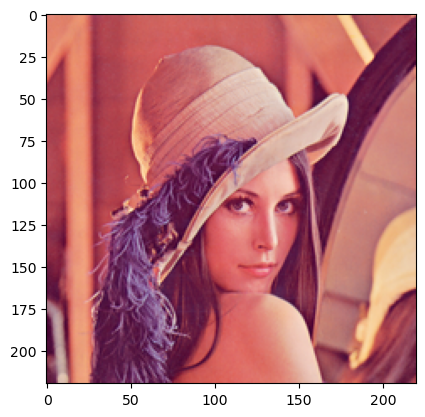

In [93]:
plt.imshow(img)

In [94]:
imggray = img.convert('LA')

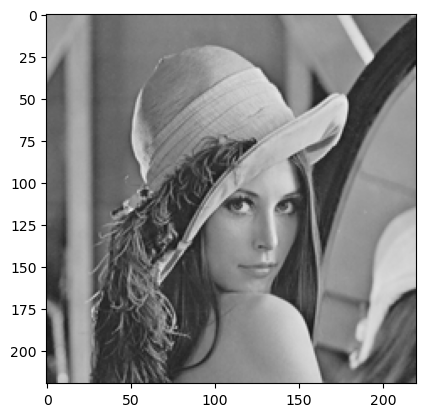

In [95]:
plt.imshow(imggray)
plt.show()

In [96]:
imgmat = np.array( list(imggray.getdata(band = 0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)

In [97]:
imgmat

matrix([[162., 162., 160., ..., 165., 172., 146.],
        [162., 161., 160., ..., 168., 177., 150.],
        [162., 159., 160., ..., 141., 124.,  89.],
        ...,
        [ 50.,  52.,  53., ...,  70.,  87.,  90.],
        [ 47.,  50.,  50., ...,  86.,  98.,  98.],
        [ 45.,  52.,  49., ...,  96., 103., 105.]])

In [98]:
imgmat.shape

(220, 220)

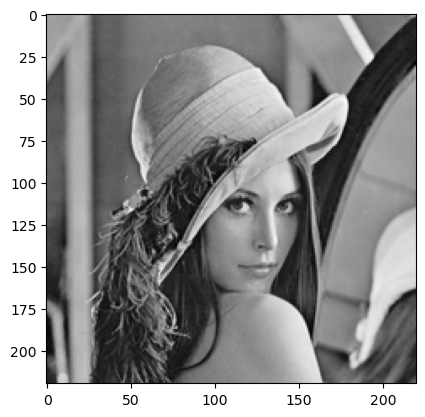

In [99]:
plt.imshow(imgmat, cmap = 'gray')
plt.savefig('Lenna_gray.png')
plt.show()

In [100]:
print("After compression: ")
U, S, Vt = np.linalg.svd(imgmat) #single value decomposition

After compression: 


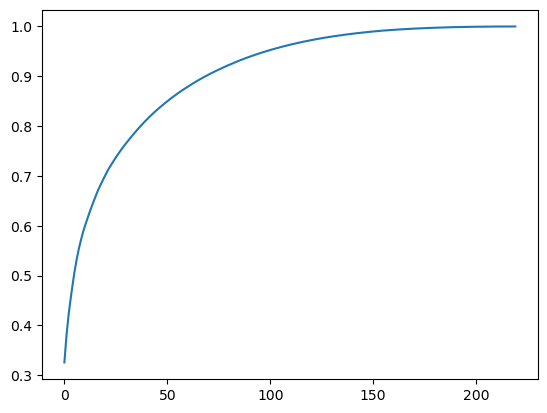

In [101]:
plt.plot(S.cumsum()/S.sum())

In [102]:
prop=S.cumsum()/S.sum()
k=np.where(prop>=0.95)[0][0]
print(k)

98


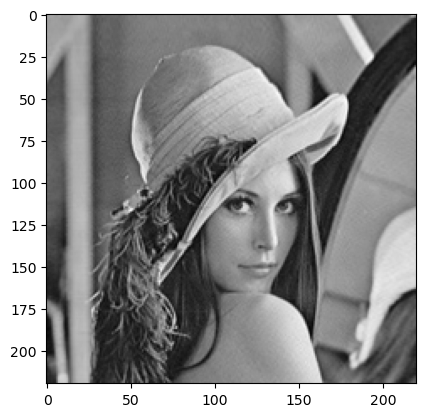

In [103]:
k=98
cmpimg = np.matrix(U[:, :k]) * np.diag(S[:k]) * np.matrix(Vt[:k,:])
plt.imshow(cmpimg, cmap = 'gray')
#plt.savefig('test_'+str(k)+'.png')
plt.show()

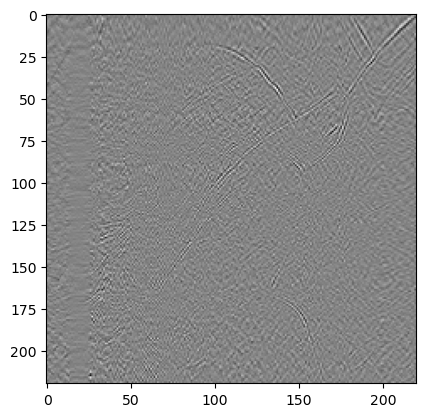

In [104]:
k=98
cmpimg = np.matrix(U[:, :k]) * np.diag(S[:k]) * np.matrix(Vt[:k,:])
plt.imshow(imgmat-cmpimg, cmap = 'gray')
#plt.savefig('test_'+str(k)+'.png')
plt.show()

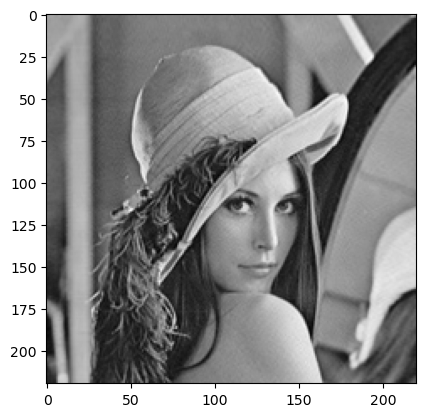

In [105]:
cmpimg = np.matrix(U[:, :k]) * np.diag(S[:k]) * np.matrix(Vt[:k,:])
plt.imshow(cmpimg, cmap = 'gray')
#plt.savefig('test_'+str(k)+'.png')
plt.show()

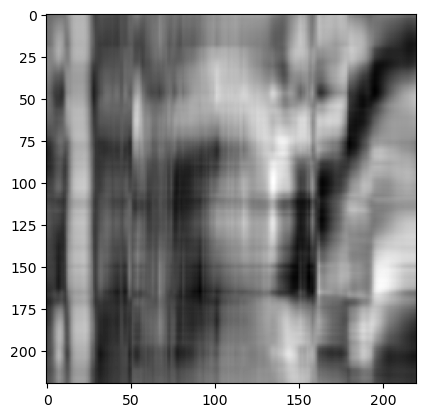

In [106]:
k=5
cmpimg = np.matrix(U[:, :k]) * np.diag(S[:k]) * np.matrix(Vt[:k,:])
plt.imshow(cmpimg, cmap = 'gray')
#plt.savefig('test_'+str(k)+'.png')
plt.show()

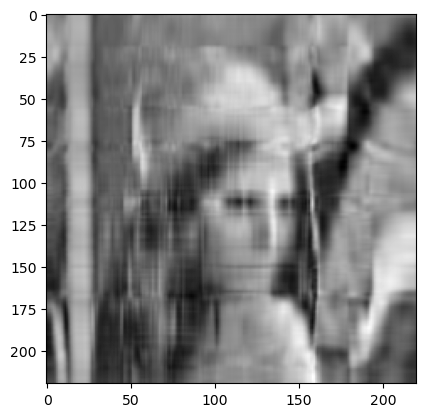

In [107]:
k=10
cmpimg = np.matrix(U[:, :k]) * np.diag(S[:k]) * np.matrix(Vt[:k,:])
plt.imshow(cmpimg, cmap = 'gray')
#plt.savefig('test_'+str(k)+'.png')
plt.show()

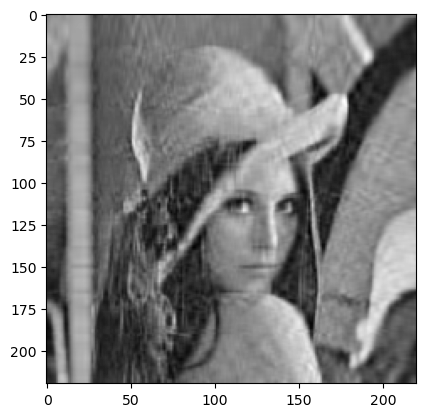

In [108]:
k=25
cmpimg = np.matrix(U[:, :k]) * np.diag(S[:k]) * np.matrix(Vt[:k,:])
plt.imshow(cmpimg, cmap = 'gray')
#plt.savefig('test_'+str(k)+'.png')
plt.show()

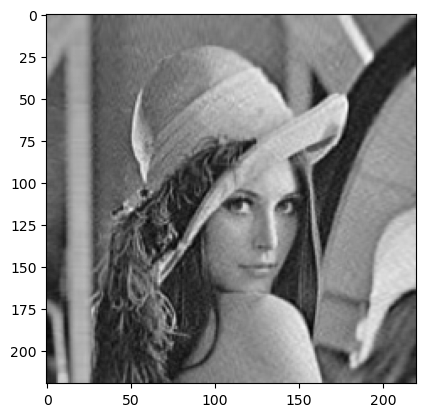

In [109]:
k=50
cmpimg = np.matrix(U[:, :k]) * np.diag(S[:k]) * np.matrix(Vt[:k,:])
plt.imshow(cmpimg, cmap = 'gray')
#plt.savefig('test_'+str(k)+'.png')
plt.show()

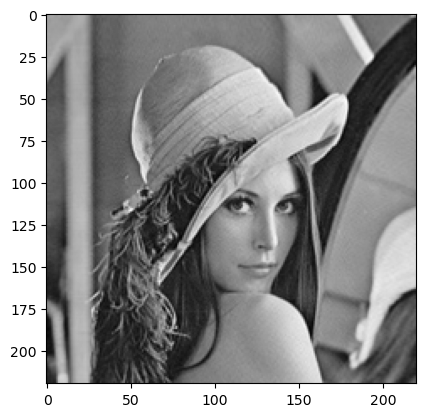

In [110]:
k=100
cmpimg = np.matrix(U[:, :k]) * np.diag(S[:k]) * np.matrix(Vt[:k,:])
plt.imshow(cmpimg, cmap = 'gray')
#plt.savefig('test_'+str(k)+'.png')
plt.show()

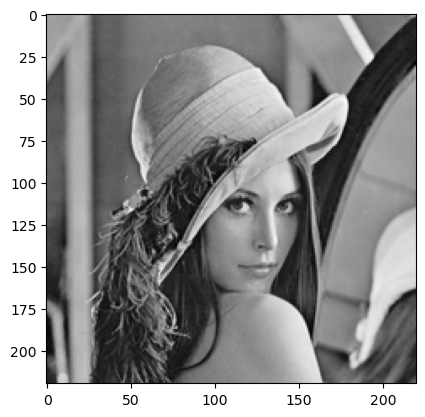

In [111]:
plt.imshow(imgmat, cmap = 'gray')
#plt.savefig('Lenna_gray.png')
plt.show()

In [112]:
S.shape

(220,)

In [113]:
S[:10]

array([27815.77383047,  4552.43379299,  3512.14006075,  2781.29316484,
        2526.29819242,  2383.80970607,  1969.75622924,  1756.13123518,
        1449.0253436 ,  1359.43698601])

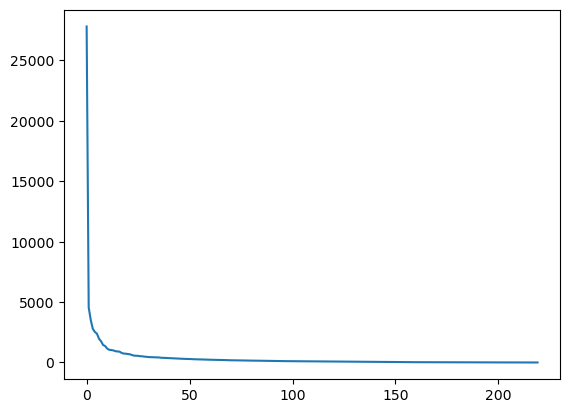

In [114]:
plt.plot(S)
plt.savefig('eigenvalues.png')
plt.show()

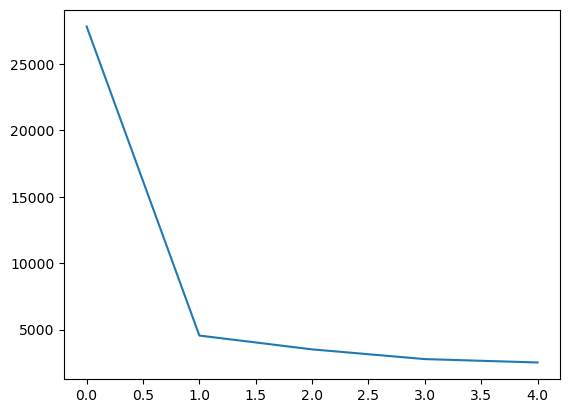

In [115]:
plt.plot(S[:5])
plt.savefig('eigen_5.png')
plt.show()

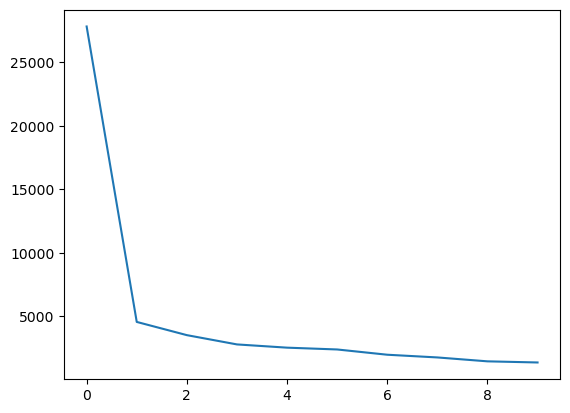

In [116]:
plt.plot(S[:10])
plt.savefig('eigen_10.png')
plt.show()

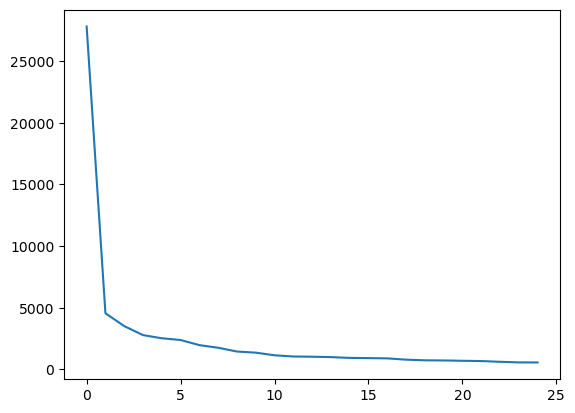

In [117]:
plt.plot(S[:25])
plt.show()

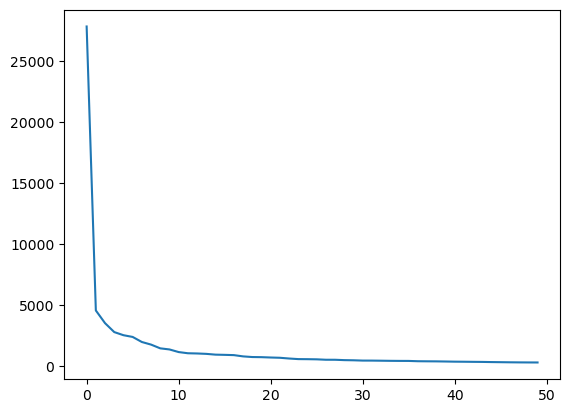

In [118]:
plt.plot(S[:50])
plt.show()

# Dữ liệu IRIS 

In [119]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = iris.data
iris_target = iris.target

In [120]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(2)
iris_transformed = svd.fit_transform(iris_data)

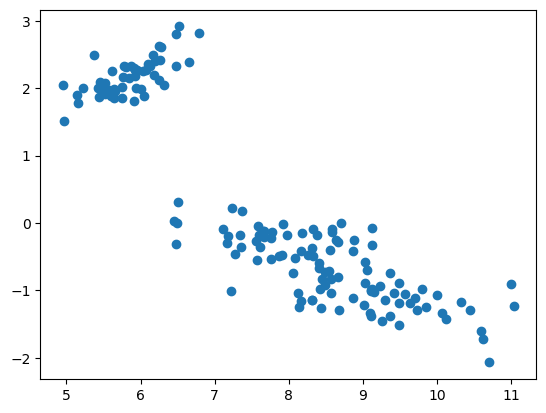

In [121]:
plt.figure()
plt.scatter(iris_transformed[:,0],iris_transformed[:,1])
plt.show()

# Dữ liệu MNIST data sets

In [122]:
from sklearn import datasets

In [123]:
#x, y = datasets.fetch_openml('mnist_784', version=1)

In [124]:
from sklearn.datasets import fetch_openml

In [125]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [126]:
X.shape

(70000, 784)

In [127]:
U, S, Vt = np.linalg.svd(X.T)

MemoryError: Unable to allocate 36.5 GiB for an array with shape (70000, 70000) and data type float64

In [ ]:
A=X.T

In [ ]:
A.shape

(784, 70000)

In [ ]:
U, S, Vt = np.linalg.svd(A)

MemoryError: Unable to allocate 36.5 GiB for an array with shape (70000, 70000) and data type float64

In [ ]:
C=X.T.dot(X)

In [ ]:
C.shape

(784, 784)

In [ ]:
#np.linalg.eigh(C)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state

In [ ]:
train_samples = 5000
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(5000, 784)

In [ ]:
A=X_train.T

In [ ]:
img=A[:,0].reshape(28,28)

In [ ]:
img.shape

(28, 28)

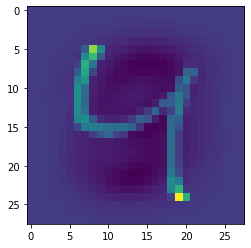

In [ ]:
plt.imshow(img)

In [ ]:
U, S, Vt = np.linalg.svd(A)

In [ ]:
k=100
Ak = np.matrix(U[:, :k]) * np.diag(S[:k]) * np.matrix(Vt[:k,:])

In [ ]:
img=Ak[:,0].reshape(28,28)

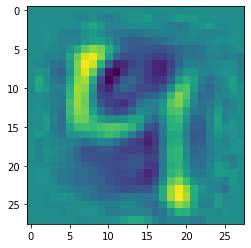

In [ ]:
plt.imshow(img)